In [2]:
%matplotlib inline
from __future__ import print_function
#import ganymede
#ganymede.configure('uav.beaver.works')
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [3]:
def check(p): pass
#check(0)

## Note

`cv2.imshow()` will not work in a notebook, even though the OpenCV tutorials use it. Instead, use `plt.imshow` and family to visualize your results.

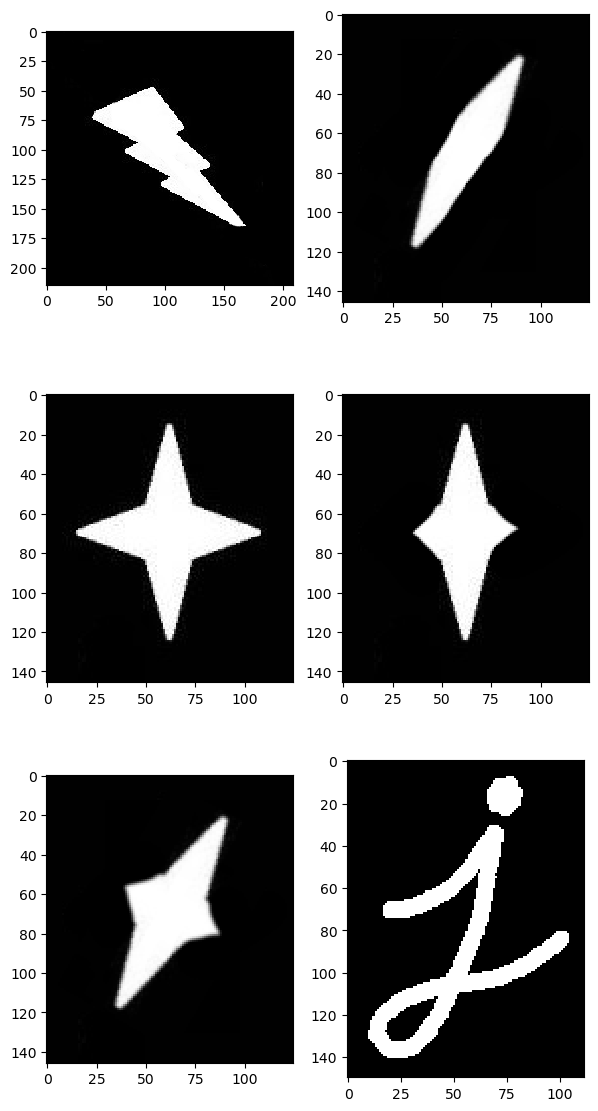

In [4]:
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('shapes/blob.png', cv2.IMREAD_GRAYSCALE)
star               = cv2.imread('shapes/star.png', cv2.IMREAD_GRAYSCALE)
squishedstar       = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.imread('shapes/squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images):
    a.imshow(i, cmap='gray', interpolation='none');
fig.set_size_inches(7,14);

In [5]:
intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

75


## Question:

What would you expect the value to be, visually? What explains the actual value?

In [6]:
# TODO
# 
# Your Answer

#Visually, after gray scaling, the number of values would seemingly just be two: black and white. These also correlate to the yellow and
#purple before gray-scaling, but that still appears as just two values. The actual value is 75 because there are a bunch more colors on the
#edges around the outline of the thunderbolt that can't be visually seen.

## Thresholding

https://docs.opencv.org/3.4.1/d7/d4d/tutorial_py_thresholding.html

2


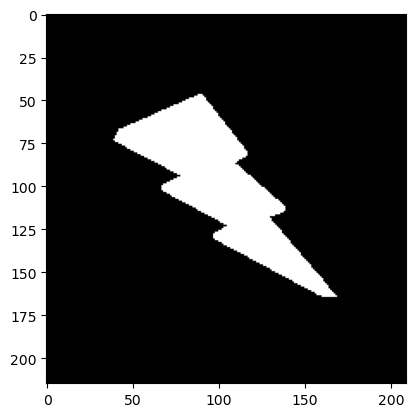

In [7]:
_, lightningbolt = cv2.threshold(lightningbolt,200,255,cv2.THRESH_BINARY)

intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

plt.imshow(lightningbolt, cmap='gray');

## Question
What happens when the above values are used for thresholding? What is a "good" value for thresholding the above images? Why?

In [8]:
## TODO
## Your answer
#They don't effectively separate the lightning bolt from the background when the above values are used for thresholding
#A "good" value should separate those well so that a distinct image can be determined from the picture and be processed later
#200 is a "good" value for thresholding because it sets any pixel with an intensity value less than 200 to 0 and generates distinct edges and
#a good image.

# Exercises

**Steps**

1. Read each tutorial
    * Skim all parts of each tutorial to understand what each operation does
    * Focus on the part you will need for the requested transformation
2. Apply the transformation and visualize it

## 1. Blend lightningbolt and blob together
https://docs.opencv.org/3.4.1/d0/d86/tutorial_py_image_arithmetics.html

*Remember:* Don't use `imshow` from OpenCV, use `imshow` from `matplotlib`

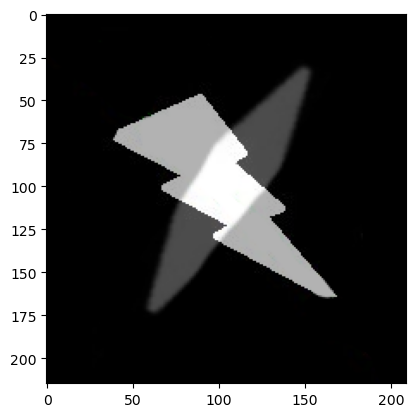

In [9]:
# 1. Blend
# TODO
img1 = cv2.imread('shapes/lightningbolt.png')
img2 = cv2.imread('shapes/blob.png')
img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

dst = cv2.addWeighted(img1,0.7,img2_resized,0.3,0)
plt.imshow(dst)

## 2. Find a ROI which contains the point of the lightning bolt

https://docs.opencv.org/3.4.1/d3/df2/tutorial_py_basic_ops.html

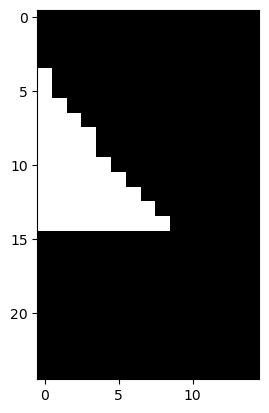

In [10]:
# 2. ROI
# TODO
point = lightningbolt[150:175, 160:175]
plt.imshow(point, cmap = 'gray')

## 3. Use an averaging kernel on the letter j

https://docs.opencv.org/3.4.1/d4/d13/tutorial_py_filtering.html

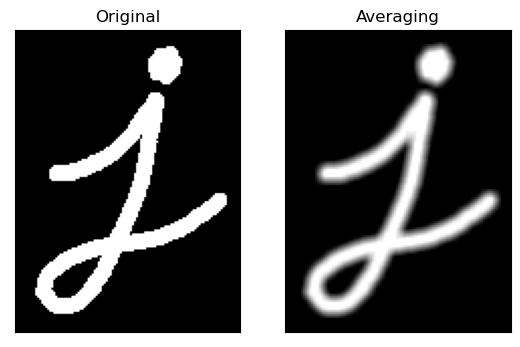

In [11]:
# 3. 
# TODO
letter = cv2.imread('shapes/letterj.png')
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(letter,-1,kernel)
plt.subplot(121),plt.imshow(letter),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# Morphology

https://docs.opencv.org/3.4.1/d9/d61/tutorial_py_morphological_ops.html

## 4. Perform erosion on j with a 3x3 kernel

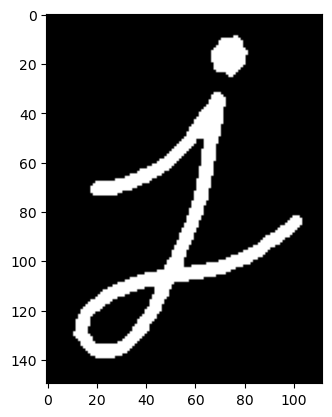

In [12]:
# 4
# TODO
img = cv2.imread('shapes/letterj.png',0)
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.imshow(erosion, cmap = 'gray')

## 5. Perform erosion on j with a 5x5 kernel

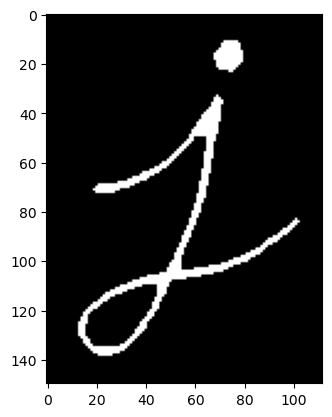

In [13]:
# 5
# TODO
img = cv2.imread('shapes/letterj.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.imshow(erosion, cmap = 'gray')

## 6. Perform erosion on j with __two__ iterations, using a kernel size of your choice

Hint: look at the OpenCV API documentation. It is possible to perform two iterations of erosion in one line of Python!

https://docs.opencv.org/3.4.1/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb



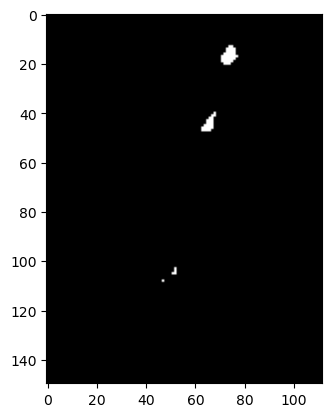

In [14]:
# 6
# TODO
img = cv2.imread('shapes/letterj.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 2)
plt.imshow(erosion, cmap = 'gray')

## 7. Perform dilation on j with a 3x3 kernel

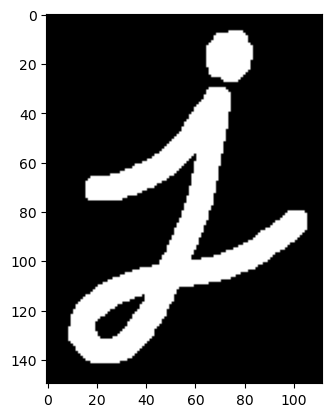

In [15]:
# 7
# TODO
img = cv2.imread('shapes/letterj.png',0)
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.imshow(dilation, cmap = 'gray')

## 8. Perform dilation on j with a 5x5 kernel

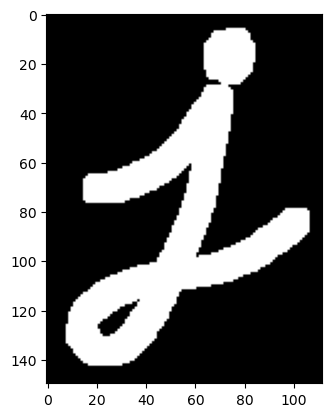

In [16]:
# 8
# TODO
img = cv2.imread('shapes/letterj.png',0)
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.imshow(dilation, cmap = 'gray')

## 9. What is the effect of kernel size on morphology operations?

In [17]:
# 9
# TODO
#Kernel size visually magnifies the extent of the morphology operations. It determines the number of pixels being considered
#with each operation, so a larger kernel size results in aggregation over a larger area. Smaller kernels have less changes because less 
#area is considered each time.

## 10. What is the difference betweeen repeated iterations of a morphology operation with a small kernel, versus a single iteration with a large kernel?

In [18]:
# 10
# TODO
#With a small kernel and repeated iterations, there would be a more refined result as opposed to a single large kernel which could simplify
#more and lose more detail.

## 11. Rotate the lightningbolt and star by 90 degrees

https://docs.opencv.org/3.4.1/da/d6e/tutorial_py_geometric_transformations.html

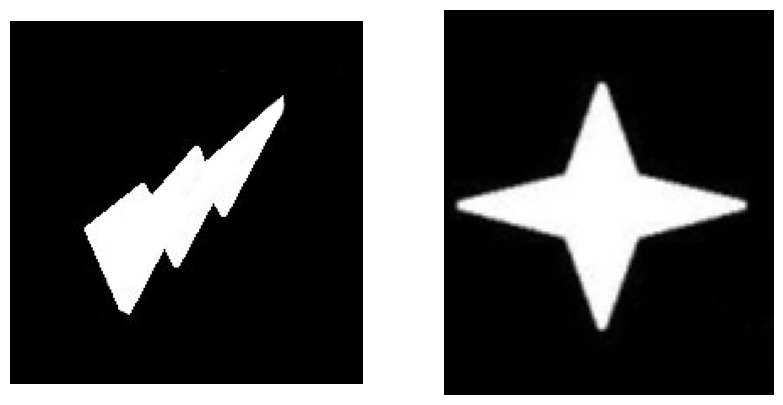

In [19]:
# 11
# TODO
img1 = cv2.imread('shapes/lightningbolt.png',0)
rows1,cols1 = img1.shape
M1 = cv2.getRotationMatrix2D((cols1/2,rows1/2),90,1)
dst1 = cv2.warpAffine(img1,M1,(cols1,rows1))

img2 = cv2.imread('shapes/star.png',0)
rows2,cols2 = img2.shape
M2 = cv2.getRotationMatrix2D((cols2/2,rows2/2),90,1)
dst2 = cv2.warpAffine(img2,M2,(cols2,rows2))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(dst1, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dst2, cmap='gray')
plt.axis('off')

plt.show()

## 12. STRETCH GOAL: 

Visualize the result of Laplacian, Sobel X, and Sobel Y on all of the images. Also, produce a combined image of both Sobel X and Sobel Y for each image. Is Exercise 1 the best way to do this? Are there other options? 

You should have 4 outputs (Laplacian, SobelX, SobelY, and the combination) for each input image visualized at the end.

https://docs.opencv.org/3.4.1/d5/d0f/tutorial_py_gradients.html

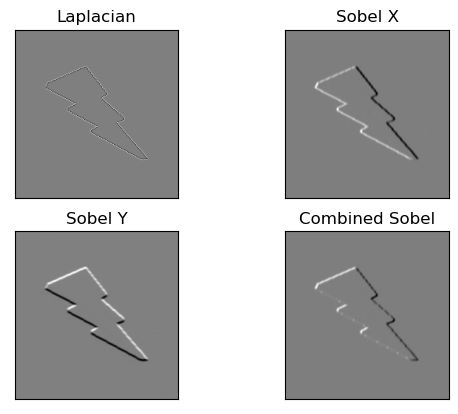

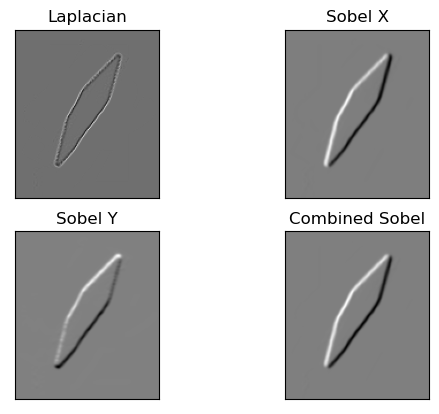

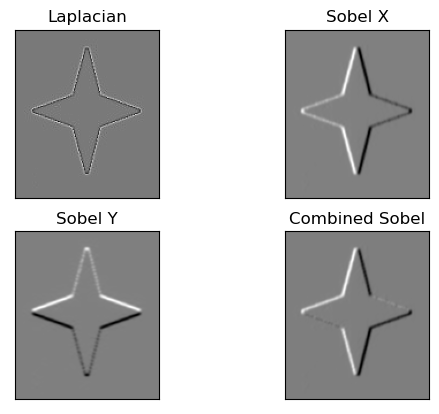

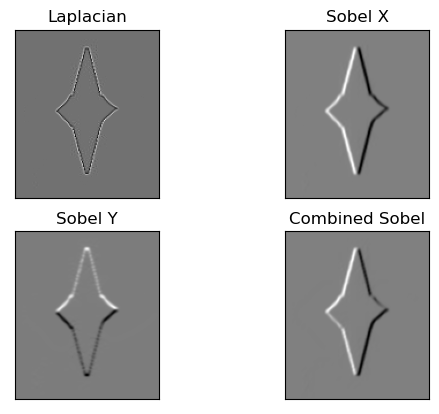

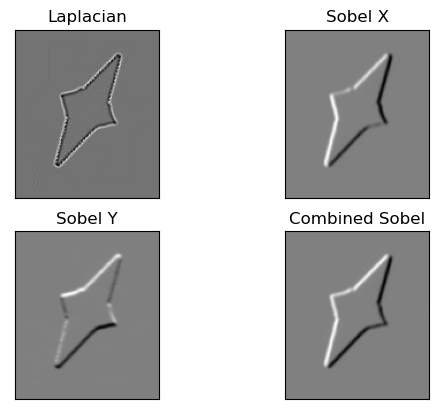

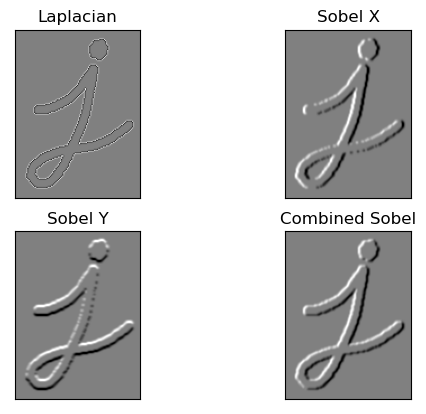

In [20]:
for img in images:
    laplacian = cv2.Laplacian(img,cv2.CV_64F)
    sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
    sobely_resized = cv2.resize(sobely, (sobelx.shape[1], sobelx.shape[0]))
    combined_sobel = cv2.addWeighted(sobelx,0.7,sobely_resized,0.3,0)
    
    plt.subplot(2,2,1),plt.imshow(laplacian,cmap = 'gray')
    plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,2),plt.imshow(sobelx,cmap = 'gray')
    plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,3),plt.imshow(sobely,cmap = 'gray')
    plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,4),plt.imshow(combined_sobel,cmap = 'gray')
    plt.title('Combined Sobel'), plt.xticks([]), plt.yticks([])

    plt.show()

## When you are done:

You should have one or more images for each exercise.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 